In [4]:
#Import Libraries we need:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Load DataSet:
tesla_df = pd.read_csv('/content/TESLA.csv')
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [6]:
tesla_df.shape

(253, 7)

In [7]:
tesla_df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [8]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [9]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df.set_index('Date', inplace = True)
tesla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [10]:
tesla_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


In [11]:
tesla_df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [12]:
tesla_df.duplicated().sum()

np.int64(0)

In [13]:
tesla_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].isin([0]).sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [14]:
#Outlier Detection:
Q1 = tesla_df['Close'].quantile(0.25)
Q3 = tesla_df['Close'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#create a new dataframe to store outliers:
outliers_df = tesla_df[(tesla_df['Close'] < lower) | (tesla_df['Close'] > upper)]

#print result:
print("Outliers in Close Column: ", outliers_df.shape[0])

Outliers in Close Column:  0


In [15]:
#reset index, so we can plot Date column:
tesla_df.reset_index(inplace = True)

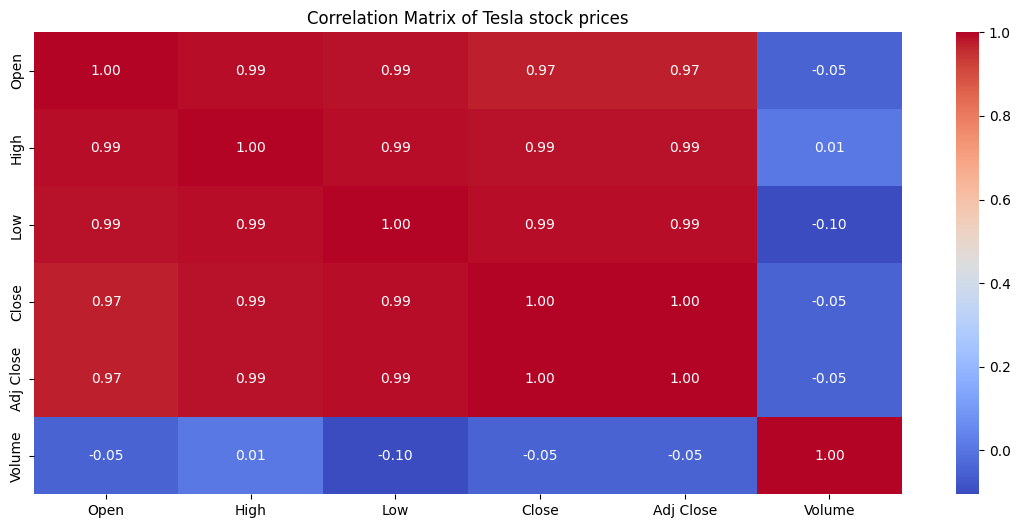

In [16]:
#Before plotting, I want to know the relationships between columns, so I will use Correlation Matrix:
correlation_matrix = tesla_df.corr(numeric_only = True)
plt.figure(figsize = (14, 6))
plt.title("Correlation Matrix of Tesla stock prices")
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

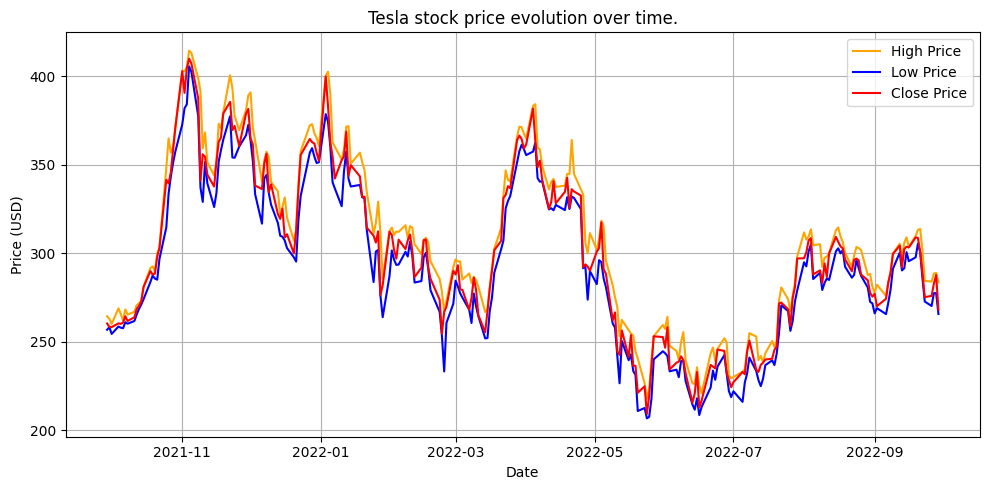

In [17]:
#Plotting Low, High and Close columns:

plt.figure(figsize = (10, 5))
plt.title("Tesla stock price evolution over time.")
#plt.plot(tesla_df['Date'], tesla_df['Open'], label = 'Open Price', alpha = 0.5, color = 'black')
plt.plot(tesla_df['Date'], tesla_df['High'], label = 'High Price', color = 'orange')
plt.plot(tesla_df['Date'], tesla_df['Low'], label = 'Low Price', color = 'blue')
plt.plot(tesla_df['Date'], tesla_df['Close'], label = 'Close Price', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

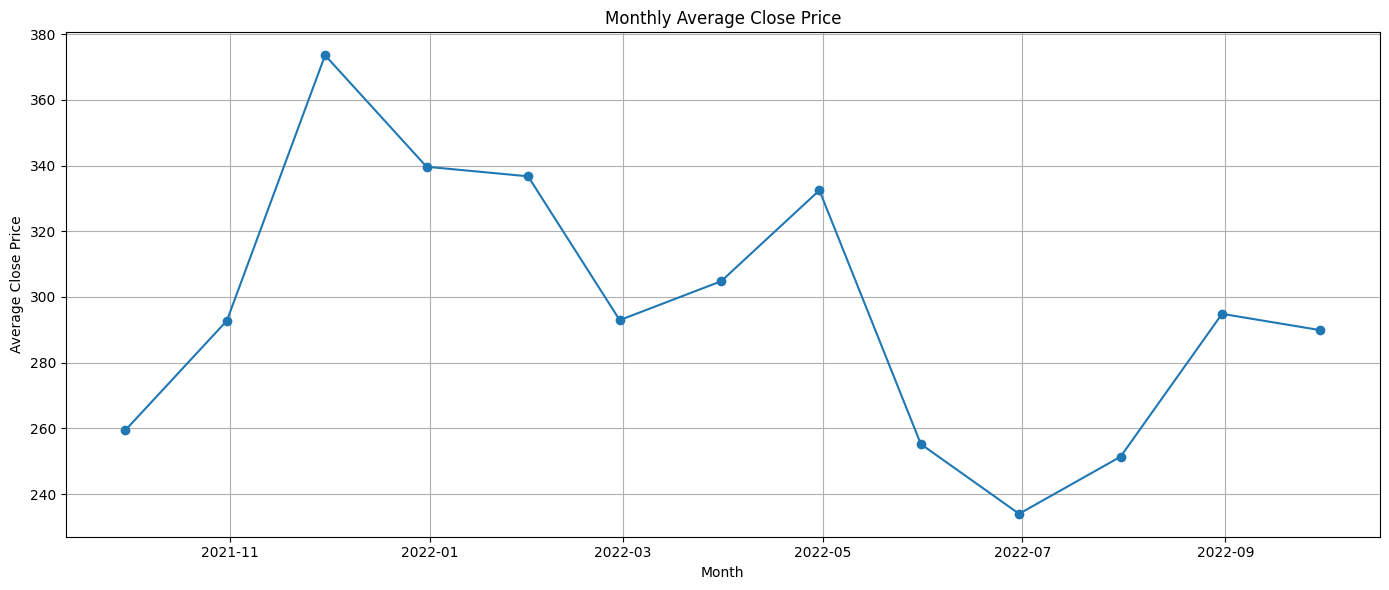

In [18]:
#Resample Close prices by month:
monthly_close_prices = tesla_df.resample('ME', on = 'Date').mean(numeric_only=True)

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_close_prices.index, monthly_close_prices['Close'], marker='o')
plt.title('Monthly Average Close Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

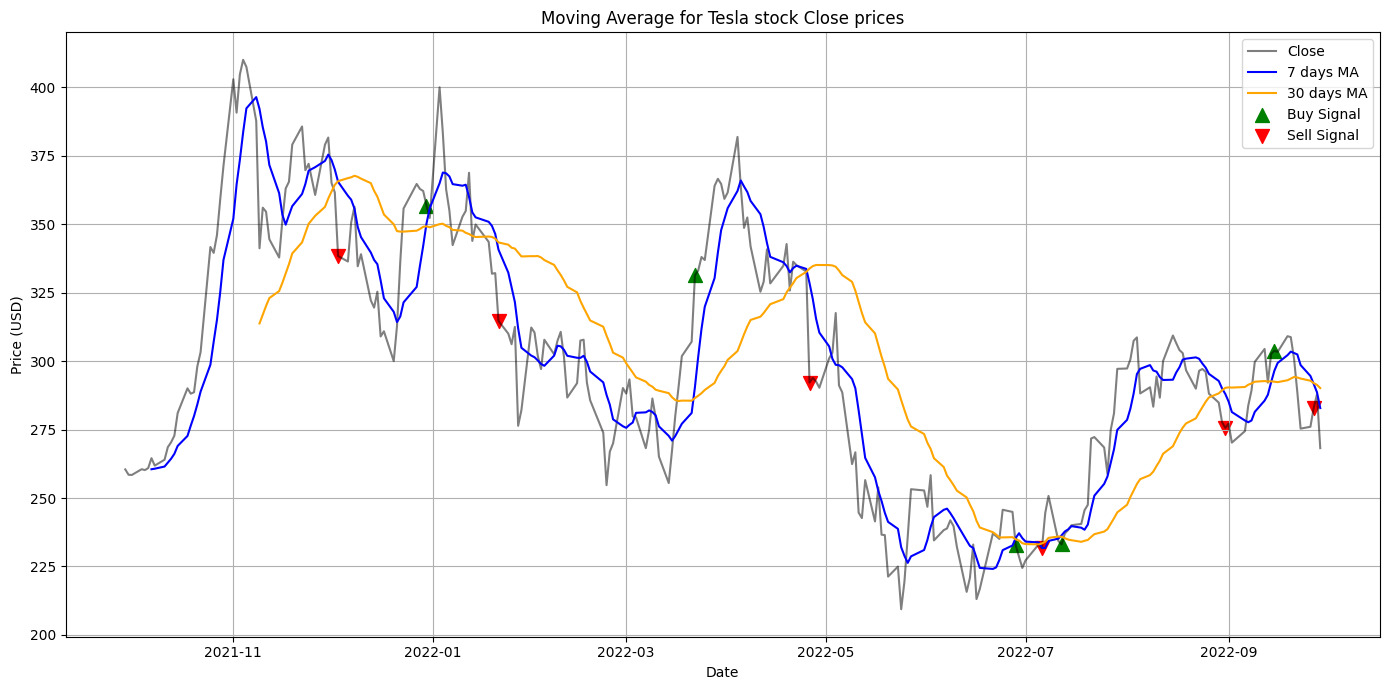

In [19]:
#Moving Average(MA) for Close prices:
tesla_df['ma_7'] = tesla_df['Close'].rolling(window = 7).mean() #MA for 7 days.
tesla_df['ma_30'] = tesla_df['Close'].rolling(window = 30).mean() #MA for 30 days.
#*****************************************************************************************

#Calculate signals:
tesla_df['prev_ma_7'] = tesla_df['ma_7'].shift(1)
tesla_df['prev_ma_30'] = tesla_df['ma_30'].shift(1)

#Buy when ma_7 crosses above ma_30:
tesla_df['crossover_signal'] = 0
tesla_df.loc[
    (tesla_df['prev_ma_7'] < tesla_df['prev_ma_30']) & (tesla_df['ma_7'] >= tesla_df['ma_30']),
    'crossover_signal'
] = 1

#Sell when ma_7 crosses below ma_30:
tesla_df.loc[
    (tesla_df['prev_ma_7'] > tesla_df['prev_ma_30']) & (tesla_df['ma_7'] <= tesla_df['ma_30']),
    'crossover_signal'
] = -1

#Now extract buy/sell signals:
buy_signals = tesla_df[tesla_df['crossover_signal'] == 1]
sell_signals = tesla_df[tesla_df['crossover_signal'] == -1]

#*****************************************************************************************
#Plotting Moving Average:

plt.figure(figsize = (14, 7))
plt.title("Moving Average for Tesla stock Close prices")

plt.plot(tesla_df['Date'], tesla_df['Close'], label = 'Close', alpha = 0.5, color = 'black')
plt.plot(tesla_df['Date'], tesla_df['ma_7'], label = "7 days MA", color = 'blue')
plt.plot(tesla_df['Date'], tesla_df['ma_30'], label = "30 days MA", color = 'orange')

plt.scatter(buy_signals['Date'], buy_signals['Close'], label = "Buy Signal", marker = '^', color = 'green', s = 100)
plt.scatter(sell_signals['Date'], sell_signals['Close'], label = "Sell Signal", marker = 'v', color = 'red', s = 100)

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

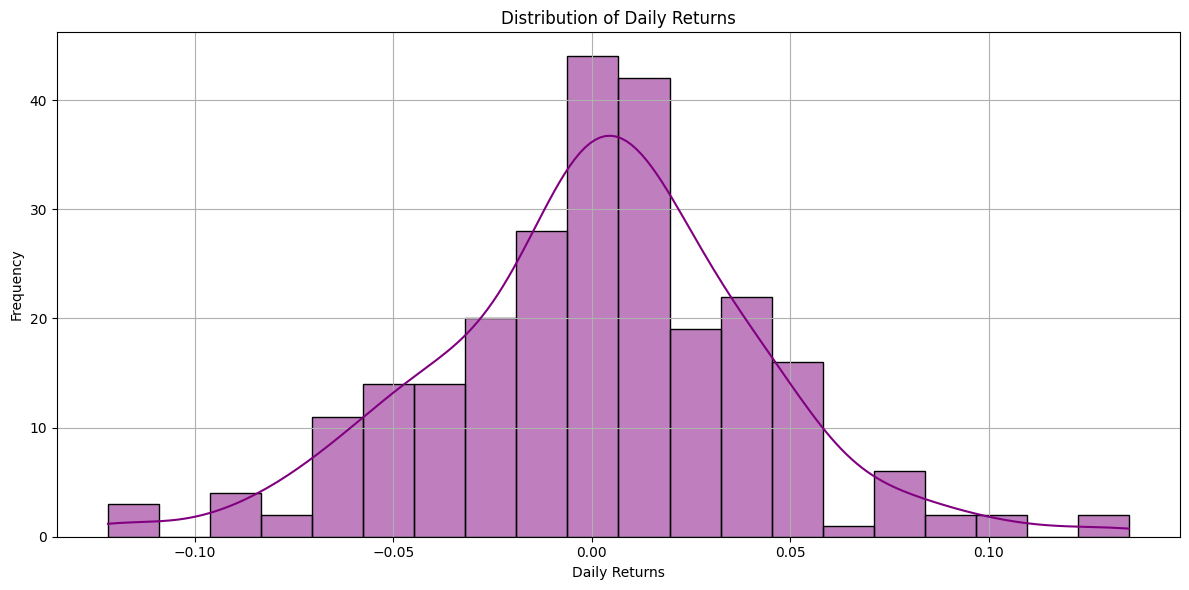

In [20]:
#Daily Returns:

#Daily Returns calculation:
tesla_df['Daily_Returns'] = tesla_df['Close'].pct_change()

#Daily Returns Plotting:

plt.figure(figsize = (12, 6))
plt.title("Distribution of Daily Returns")

sns.histplot(tesla_df['Daily_Returns'].dropna(), bins = 20, kde = True, color = 'purple')

plt.xlabel("Daily Returns")
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
tesla_df['Daily_Returns'].describe()

,Daily_Returns
count,252.000000
mean,0.000938
std,0.040528
min,-0.121841
25%,-0.022971
50%,0.002320
75%,0.022931
max,0.135317


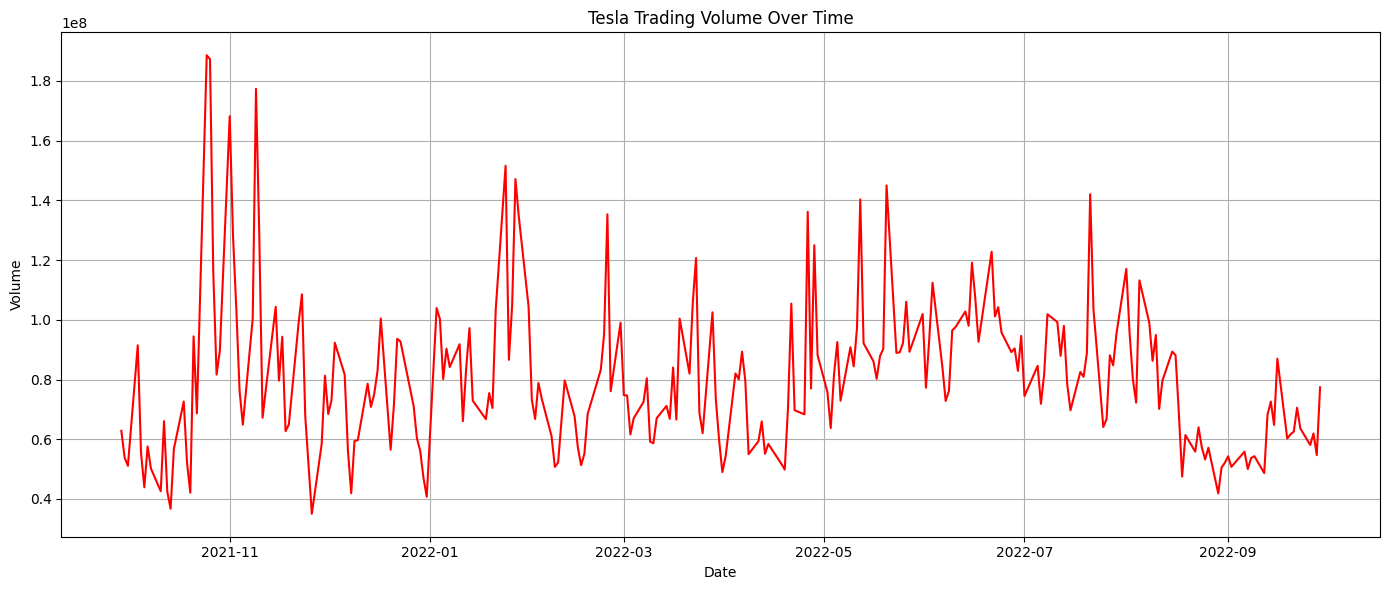

In [22]:
#Volume Trends over time:

plt.figure(figsize=(14, 6))
plt.plot(tesla_df['Date'], tesla_df['Volume'], color='red')
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.tight_layout()
plt.show()

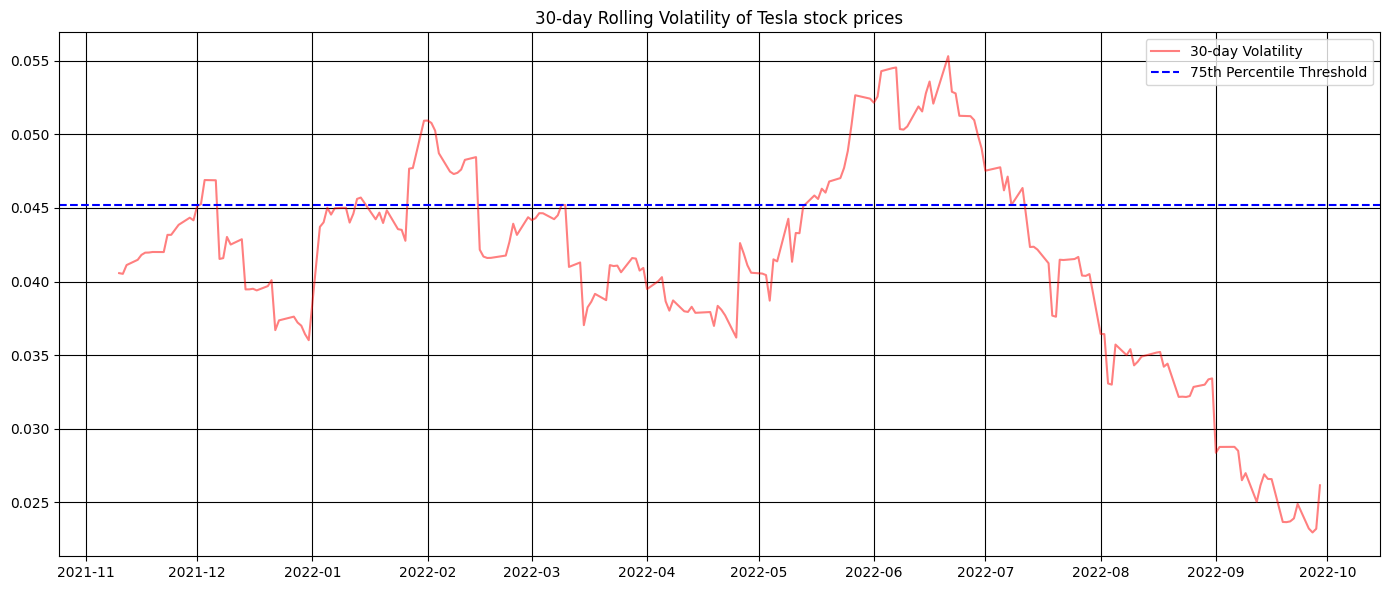

In [23]:
#Volatility Analysis:
tesla_df['Volatility_Analysis'] = tesla_df['Daily_Returns'].rolling(window = 30).std()
base_line = tesla_df['Volatility_Analysis'].quantile(0.75)

#Plotting Volatility:
plt.figure(figsize = (14, 6))
plt.title("30-day Rolling Volatility of Tesla stock prices")

plt.plot(tesla_df['Date'], tesla_df['Volatility_Analysis'], label = "30-day Volatility",color = 'red', alpha = 0.5)
plt.axhline(y = base_line, color = 'blue', linestyle = '--', label = "75th Percentile Threshold")

plt.tight_layout()
plt.legend()
plt.grid(True, color = 'black')
plt.show()

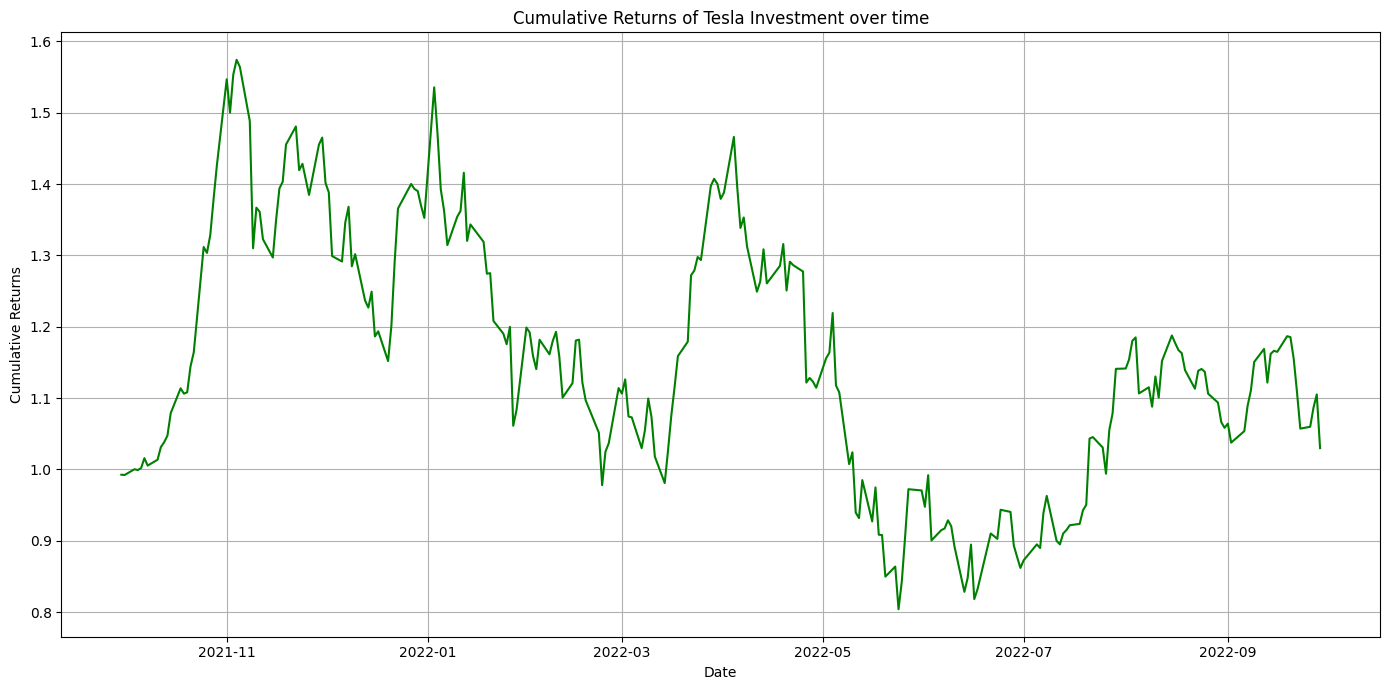

In [24]:
#Cumulative Returns:

tesla_df['Cumulative_Returns'] = (1 + tesla_df['Daily_Returns']).cumprod()

#Plotting:

plt.figure(figsize = (14, 7))
plt.title("Cumulative Returns of Tesla Investment over time")

plt.plot(tesla_df['Date'], tesla_df['Cumulative_Returns'], color = 'green')

plt.xlabel('Date')
plt.ylabel("Cumulative Returns")
plt.grid(True)
plt.tight_layout()
plt.show()

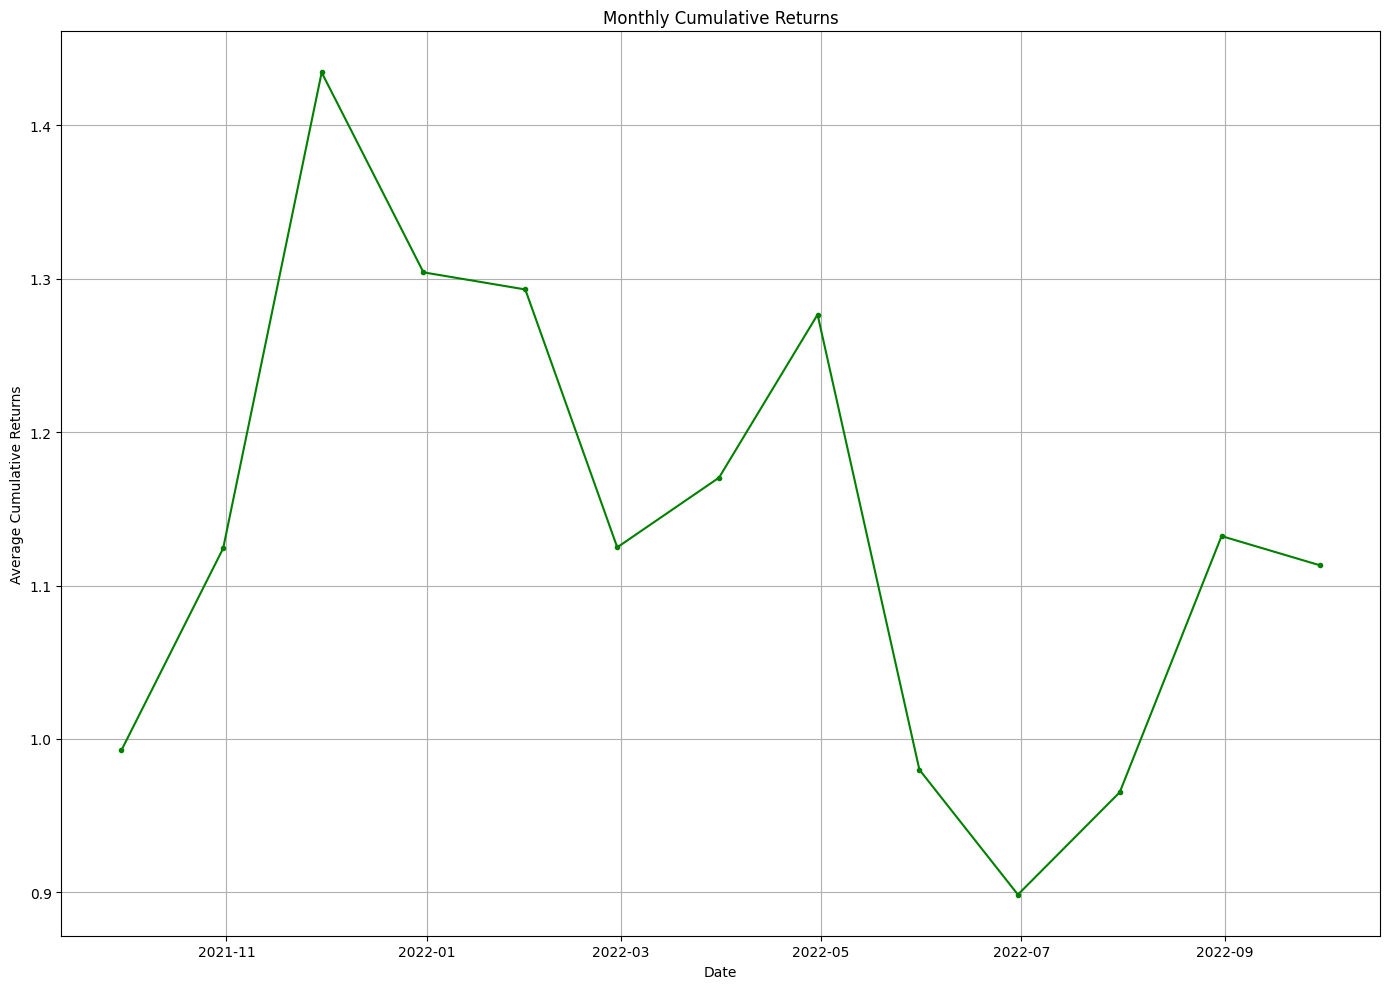

In [25]:
#Resample Cumulative Returns by month:
monthly_cumulative_returns = tesla_df.resample('ME', on = 'Date').mean(numeric_only = True)

#Plotting:
plt.figure(figsize = (14, 10))
plt.title("Monthly Cumulative Returns")

plt.plot(monthly_cumulative_returns.index, monthly_cumulative_returns['Cumulative_Returns'], marker = '.', color = 'green')

plt.xlabel('Date')
plt.ylabel('Average Cumulative Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

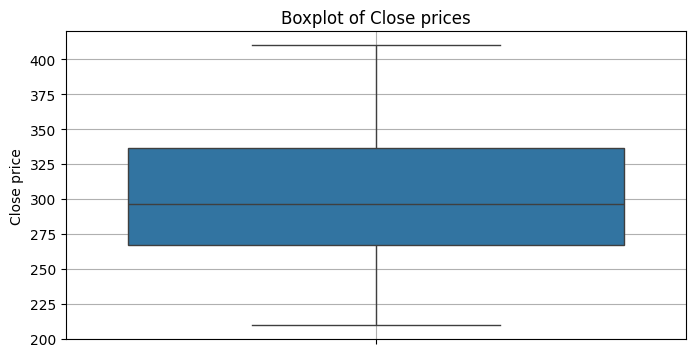

In [26]:
#Boxplot of Close prices, to identify skewness and outliers:

plt.figure(figsize = (8, 4))
plt.title("Boxplot of Close prices")

sns.boxplot(y = tesla_df['Close'])

plt.ylabel("Close price")
plt.grid(True)
plt.show()

In [27]:
tesla_df.set_index('Date', inplace = True)

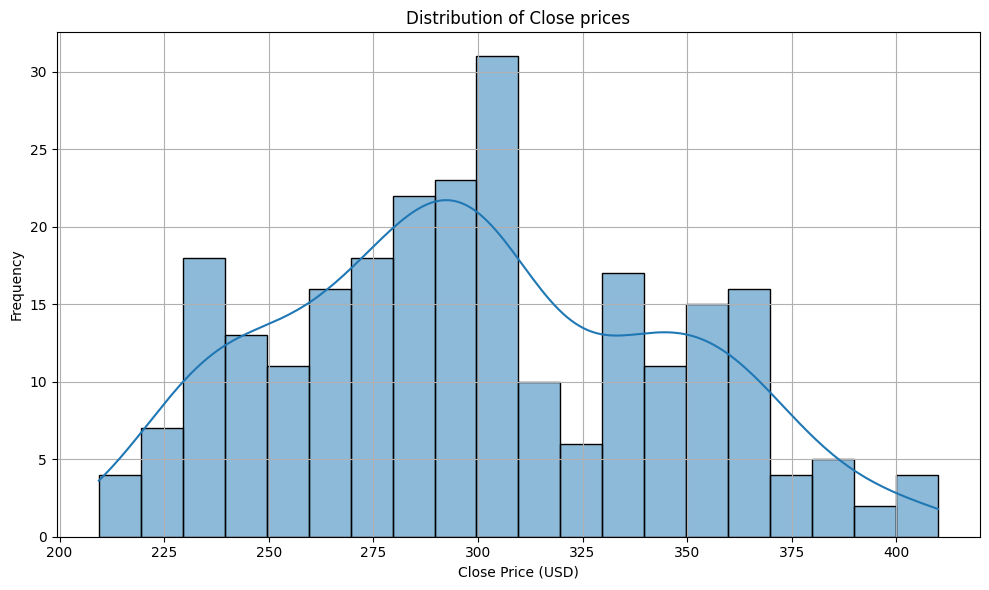

In [28]:
#Distribution plot of Close prices:
plt.figure(figsize = (10, 6))
plt.title("Distribution of Close prices")

sns.histplot(tesla_df['Close'], bins = 20, kde = True)

plt.xlabel("Close Price (USD)")
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()